In [1]:
# for viz
import matplotlib.pyplot as plt
# for statistics
from scipy import stats
# for numerical data:
import numpy as np
import env

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?  

In [2]:
λ = 2
car_distribution = stats.poisson(λ)
domain = [n for n in range(13)]
prob = [car_distribution.pmf(n) for n in domain]

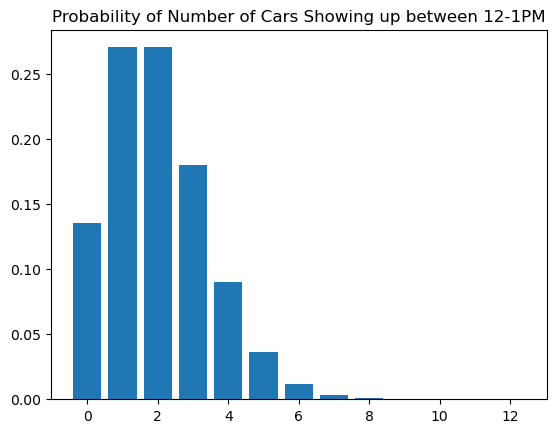

In [3]:
plt.bar(domain, prob)
plt.title('Probability of Number of Cars Showing up between 12-1PM')
plt.show()

In [6]:
car_distribution.pmf(0)

0.1353352832366127

In [7]:
car_distribution.cdf(0)

0.1353352832366127

What is the probability that 3 or more cars come through the drive through?  

In [8]:
car_distribution.sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?  

In [9]:
car_distribution.sf(0)

0.8646647167633873

In [10]:
1 - car_distribution.pmf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?  
- What GPA constitutes the bottom 15% of the class?  
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  
- If I have a GPA of 3.5, what percentile am I in?

In [11]:
mean = μ = 3.0
std_dev = σ = 0.3
gpa_dist = stats.norm(μ, σ)

In [12]:
mean, μ

(3.0, 3.0)

In [13]:
# what GPA is required to be in the top 5%?
gpa_dist.isf(0.05)

3.4934560880854417

In [14]:
gpa_dist.ppf(0.95)

3.4934560880854417

In [15]:
# bottom 15 percent?
gpa_dist.ppf(0.15)

2.689069983151863

In [16]:
gpa_dist.isf(0.85)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  

1st decile: 0-10 percentile  
2nd decile: 10-20 percentile   
3rd decile: 20-30 percentile

In [ ]:
# I want the range of grades that will put me 
# in the bracket of 20 - 30 %

If I have a GPA of 3.5, what percentile am I in?

In [17]:
# lets get the values associated with those percentiles
# so we know what gpa values we need to be between in order to qualify for this scholarship
gpa_lower = gpa_dist.ppf(0.2)
gpa_higher = gpa_dist.ppf(0.3)

In [19]:
gpa_lower, gpa_higher

(2.7475136299281258, 2.842679846187588)

In [20]:
gpa_for_qualification = 2.8
gpa_lower < gpa_for_qualification < gpa_higher

True

In [23]:
higher_fence = gpa_dist.ppf([0.2,0.3])[1]

In [28]:
lower_fence, higher_fence  = gpa_dist.ppf((0.2,0.3))
lower_fence < gpa_for_qualification < higher_fence

True

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [29]:
# if I thought about this as a poisson: lambda, the mean of events happening over a window
# would be 0.02 * 4326

In [30]:
click_distribution = stats.binom(4326, 0.02)

In [31]:
# probability of exactly 97?
click_distribution.pmf(97)

0.021942930454375544

In [32]:
# probability of 97 or more?
click_distribution.sf(96)

0.13975823631416448

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [33]:
# what type distribution?
# binomial
# number of trials?
# 60, we are only looking at the first 60 trials
# prob of success?
# 0.01 because we are looking at hundreths place decimals

In [34]:
answer_dist = stats.binom(60, 0.01)

In [35]:
answer_dist.sf(0)

0.45284335760923855

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [36]:
# what type distro?
# binomial! Number of trials: ?
# success rate: 0.03
# num trials: 3 * 22 * 0.9
students_in_one_cohort = 22
num_cohorts = 3
prop_students = 0.9
num_trials = students_in_one_cohort * num_cohorts * prop_students

In [38]:
# make sure our number of trials is an integer!
num_trials = round(num_trials)

In [39]:
prob_clean = 0.03
clean_dist = stats.binom(num_trials, prob_clean)

In [40]:
# break area gets cleaned at least once in a day?
clean_dist.sf(0)

0.8342199288437352

In [41]:
# how likely is it that it goes two days without cleaning?
# twice as many trials!
# probability of exactly zero times cleaned over two days:
clean_dist = stats.binom(num_trials * 2, prob_clean)
clean_dist.pmf(0)

0.027483031992576134

In [42]:
# what about one week?
clean_dist = stats.binom(num_trials * 5, prob_clean)
clean_dist.pmf(0)

0.00012521651388091245

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [43]:
# normal distribution, but I want to know about if I will have enough time to eat!
# so, lets look at the people in terms of minutes
# 2 minutes for each person to order
# average of 15 folks
# standard deviation of 3 folks
# normal dist for time: (15*2), standard dev for time: (3*2)
panaderia_dist = stats.norm((15*2), (3*2))

In [44]:
# lunch break stats:
# 60 minutes at start:
# 10 minutes to get my food
# 2 minutes for *me* to order

In [45]:
lunch_break = 60
time_waiting = 10
time_ordering = 2
time_bank = lunch_break - time_waiting - time_ordering

In [48]:
# take away the time I have to eat, which gives me the maximum amount of time
# that people could take up in line outside of the static values
# that I need in order to CONSUME
time_bank = time_bank - 15

In [50]:
panaderia_dist.cdf(time_bank)

0.6914624612740131

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?  
What percent of employees earn more than 95,000?  
What percent of employees earn between 65,000 and 80,000?  
What do the top 5% of employees make?

In [51]:
# gonna need pandas for this
import pandas as pd

In [52]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

In [56]:
# we are getting our mu/mean and our sigma/stdev from the data itself
sal_stats = salaries.salary.agg(['std','mean'])

In [57]:
sal_stats['std']

17309.995380251985

In [58]:
sal_stats['mean']

72012.23585730705

In [59]:
sal_distribution = stats.norm(sal_stats['mean'], sal_stats['std'])

In [60]:
# What percent of employees earn less than 60,000?
# prob of employees that are 60k or below? cdf
sal_distribution.cdf(60_000)

0.24385742480214434

In [63]:
(salaries.salary < 60_000).sum() / len(salaries.salary)

0.2705727041028802

In [64]:
# What percent of employees earn more than 95,000?
sal_distribution.sf(95_000)

0.09208819199804058

In [65]:
(salaries.salary > 90_000).sum() / len(salaries.salary)

0.15591111259182755

In [69]:
# What percent of employees earn 
# between 65,000 and 80,000?
# cdf gives us our cumulative probability, so lets get the
# value between these two fences by subtraction
low, high = sal_distribution.cdf([65_000, 80_000])

In [70]:
high - low

0.33506056854466654

In [71]:
((salaries.salary > 65_000) & (salaries.salary < 80_000)).sum() / len(salaries.salary)

0.325107028035515

In [72]:
# What do the top 5% of employees make?

sal_distribution.isf(0.05)

100484.64454102777